In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
!pip install yellowbrick=='1.3.post1'
import yellowbrick
from yellowbrick.cluster import KElbowVisualizer
import time
import random
from tqdm import tqdm
from sklearn.metrics import silhouette_score

ERROR: Could not find a version that satisfies the requirement yellowbrick=='1.3.post1' (from versions: 0.1, 0.3a1, 0.3.1, 0.3.2, 0.3.3, 0.4, 0.4.1, 0.4.2, 0.5, 0.6, 0.7, 0.8, 0.9, 0.9.1, 1.0, 1.0.post1, 1.0.1, 1.1, 1.2, 1.2.1, 1.3, 1.3.post1)
ERROR: No matching distribution found for yellowbrick=='1.3.post1'


In [2]:
yellowbrick.__version__

'1.3.post1'

In [3]:
# from google.colab import drive
# drive.mount('/content/drive')

In [4]:
main_data = pd.read_csv("toy_dataset.csv")

# Exploratory Data Analysis

In [5]:
main_data.head()

,Number,City,Gender,Age,Income,Illness
0,1,Dallas,Male,41,40367.0,No
1,2,Dallas,Male,54,45084.0,No
2,3,Dallas,Male,42,52483.0,No
3,4,Dallas,Male,40,40941.0,No
4,5,Dallas,Male,46,50289.0,No


In [6]:
main_data.describe(include="all")

,Number,City,Gender,Age,Income,Illness
count,150000.000000,150000,150000,150000.000000,150000.000000,150000
unique,NaN,8,2,NaN,NaN,2
top,NaN,New York City,Male,NaN,NaN,No
freq,NaN,50307,83800,NaN,NaN,137861
mean,75000.500000,NaN,NaN,44.950200,91252.798273,NaN
std,43301.414527,NaN,NaN,11.572486,24989.500948,NaN
min,1.000000,NaN,NaN,25.000000,-654.000000,NaN
25%,37500.750000,NaN,NaN,35.000000,80867.750000,NaN
50%,75000.500000,NaN,NaN,45.000000,93655.000000,NaN
75%,112500.250000,NaN,NaN,55.000000,104519.000000,NaN


In [7]:
main_data.isnull().sum()

Number     0
City       0
Gender     0
Age        0
Income     0
Illness    0
dtype: int64

# Now visualizing the categorical variables

In [8]:
import matplotlib.pyplot as plt

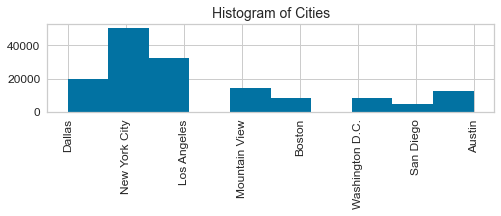

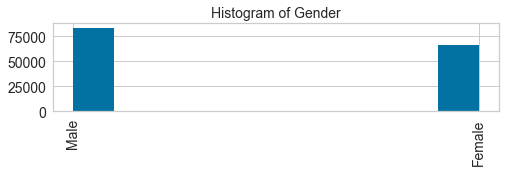

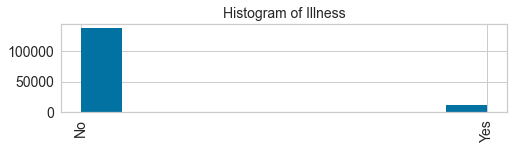

In [9]:
plt.subplot(3,1,1)
plt.xticks(fontsize=12,rotation=90)
plt.yticks(fontsize=12)
plt.title("Histogram of Cities",fontsize=14)
plt.hist(main_data["City"],histtype='bar',align="mid")
plt.show()
plt.subplot(3,1,2)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.title("Histogram of Gender",fontsize=14)
plt.hist(main_data["Gender"])
plt.show()
plt.subplot(3,1,3)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.title("Histogram of Illness",fontsize=14)
plt.hist(main_data["Illness"])
plt.show()

# Visualizing the Numerical Variables

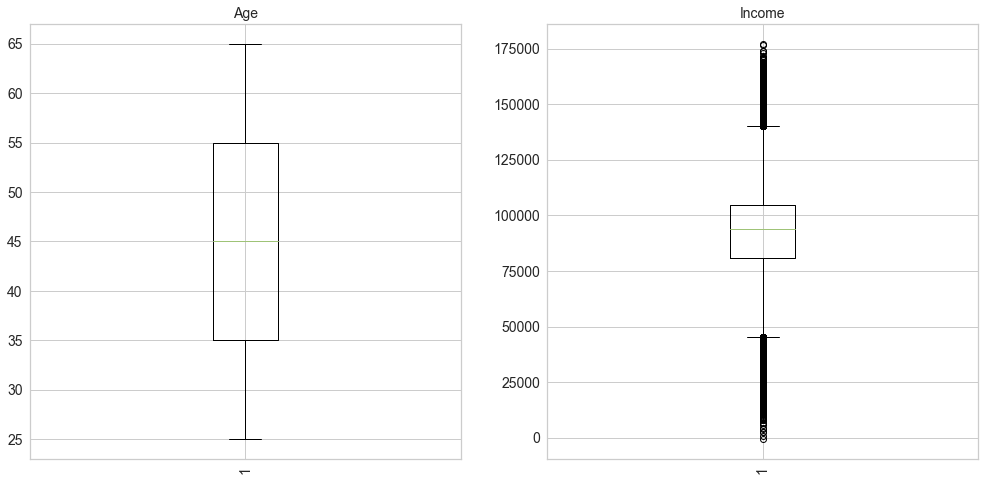

In [10]:
plt.figure(figsize=(17,8))
plt.subplot(1,2,1)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.boxplot(main_data["Age"])
plt.title("Age",fontsize=14)
plt.subplot(1,2,2)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.boxplot(main_data["Income"])
plt.title("Income",fontsize=14)
plt.show()


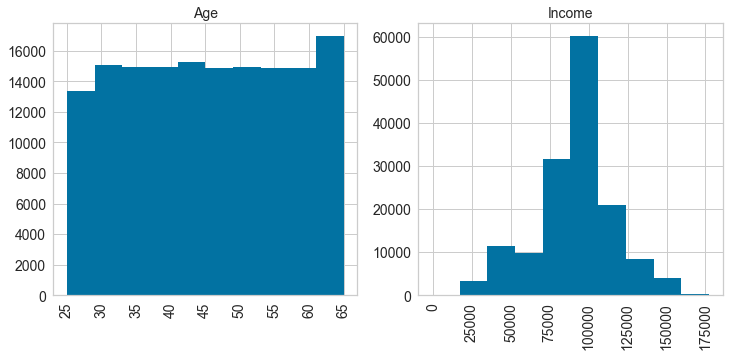

In [11]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.hist(main_data.Age)
plt.title("Age",fontsize=14)
plt.subplot(1,2,2)
plt.xticks(fontsize=14,rotation=90)
plt.yticks(fontsize=14)
plt.hist(main_data.Income)
plt.title("Income",fontsize=14)
plt.show()

In [12]:
main_data[["Age","Income"]].corr()
# Very Weak Correlation 

,Age,Income
Age,1.000000,-0.001318
Income,-0.001318,1.000000



# Multi-variable analysis

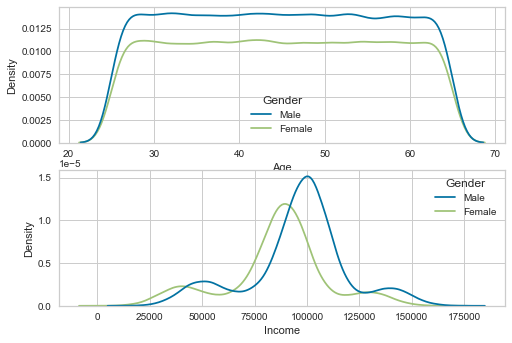

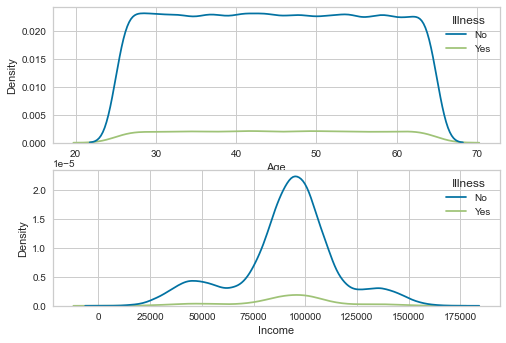

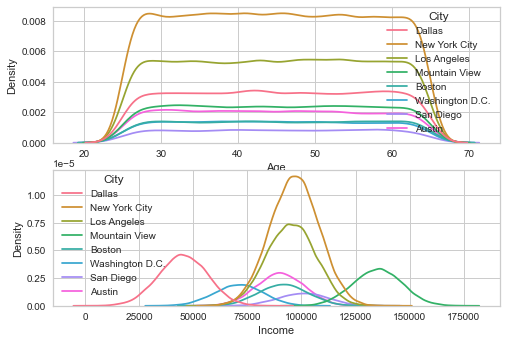

In [13]:
main_data_2 = main_data.drop("Number",axis=1)
plt.subplot(2,1,1)
sns.kdeplot(x="Age",data=main_data_2,hue=main_data_2["Gender"])
plt.subplot(2,1,2)
sns.kdeplot(x="Income",data=main_data_2,hue=main_data_2["Gender"])
plt.show()

plt.subplot(2,1,1)
sns.kdeplot(x="Age",data=main_data_2,hue=main_data_2["Illness"])
plt.subplot(2,1,2)
sns.kdeplot(x="Income",data=main_data_2,hue=main_data_2["Illness"])
plt.show()

plt.subplot(2,1,1)
sns.kdeplot(x="Age",data=main_data_2,hue=main_data_2["City"])
plt.subplot(2,1,2)
sns.kdeplot(x="Income",data=main_data_2,hue=main_data_2["City"])
plt.show()




# Creating the K-means Algorithm

In [14]:
def number_of_k(data):
    model = KMeans()
    visualizer = KElbowVisualizer(model, k=(1,12), timings=False)
    visualizer.fit(data)
    visualizer.show()
    return visualizer.elbow_value_
    

def scale_data(data):
    mmscaler = MinMaxScaler()
    scaled_data = mmscaler.fit_transform(data)
    colnames = data.columns
    df2 = pd.DataFrame(scaled_data,columns=colnames)
    return df2
    
def create_centroids(data,n=3,type="existing"):
    '''
    inputs:
    data = A pandas dataframe
    n = number of centroids required
    type:
        existing - takes first n datapoints and assigns values to k
        random - takes random number in range of each column  and assigns values to k
    
    
    '''
    k = []
    if(type=="existing"):
        random_values = [random.randrange(0,len(data)) for i in range(n)]
        k.append([data.iloc[j].tolist() for j in random_values])
        k = [x for y in k for x in y]
        return k
    else:
        cols = data.columns.tolist()
        [k.append([random.uniform(min(data[i].tolist()),max(data[i].tolist())) for i in cols])  for j in range(n)]
        return k

def get_centroid2(k,data):
    
    bbb = np.array(data)
    val = []
    for i in k:
        val2 = []
        ccc = lambda x: np.linalg.norm(i-x)
        [val2.append(ccc(f)) for f in bbb]
        val.append(val2)
    val = np.array(val)
    centroids = [np.argmin(val[:,i]) for i in range(val.shape[1])]
    return np.array(centroids)

def update_k_position(k,centroids,data):
    for i in range(len(k)):
        k[i] = [sum(data[centroids==i].iloc[:,z])/len(data[centroids==i].iloc[:,z]) 
                for z in range(len(data.iloc[0].tolist()))]
    return k

def train_kmean(k,data,iteration=10):
    for i in range(iteration):
        kbar = k
        a = time.time()
        centroids = get_centroid2(k,data)
        k = update_k_position (k,centroids,data)
#         print("time taken:",time.time()-a)
#         print("_____________________")
    return centroids

def visualize_histograms(data):
    columns = data.columns
    columns = [i for i in columns if i not in ["labels"]]
    for i in columns:
        sns.histplot(data = data,x=i,hue=data["labels"],)
        plt.xticks(rotation = 90)
        plt.show()


# Dealing with Categorical Variables:

## There are in total 3 different things that I have tried. 
* Label Encode the categorical variables
* OneHot Encode the categorical variables
* Remove categorical variables and use only numerical variables

## Preparing Data for Label Encoding

In [15]:
label_encoded_data = main_data.copy()
label_encoded_data.drop(["Number"],axis=1,inplace=True)
label_encoded_data["City"] = label_encoded_data["City"].map({y:x for x,y in enumerate(label_encoded_data["City"].unique())})
label_encoded_data["Gender"] = label_encoded_data["Gender"].map({y:x for x,y in enumerate(label_encoded_data["Gender"].unique())})
label_encoded_data["Illness"] = label_encoded_data["Illness"].map({y:x for x,y in enumerate(label_encoded_data["Illness"].unique())})
label_encoded_data = scale_data(label_encoded_data)
label_encoded_data.describe()

,City,Gender,Age,Income,Illness
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.329947,0.441333,0.498755,0.516879,0.080927
std,0.290591,0.496548,0.289312,0.140540,0.272723
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142857,0.000000,0.250000,0.458474,0.000000
50%,0.285714,0.000000,0.500000,0.530389,0.000000
75%,0.428571,1.000000,0.750000,0.591488,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


# Preparing Data for OneHot Encoding

In [16]:
onehot_data = main_data.copy()
onehot_data = pd.get_dummies(onehot_data)
onehot_data = scale_data(onehot_data)
onehot_data.describe()


,Number,Age,Income,City_Austin,City_Boston,City_Dallas,City_Los Angeles,City_Mountain View,City_New York City,City_San Diego,City_Washington D.C.,Gender_Female,Gender_Male,Illness_No,Illness_Yes
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.00000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.500000,0.498755,0.516879,0.081947,0.055340,0.131380,0.214487,0.094793,0.335380,0.03254,0.054133,0.441333,0.558667,0.919073,0.080927
std,0.288678,0.289312,0.140540,0.274284,0.228643,0.337817,0.410467,0.292930,0.472125,0.17743,0.226281,0.496548,0.496548,0.272723,0.272723
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.250000,0.458474,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.500000,0.500000,0.530389,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,0.750000,0.750000,0.591488,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


# Preparing Data for Numerical-only variables

In [17]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numerical_data = main_data.select_dtypes(include=numerics)
numerical_data.drop("Number",axis=1,inplace=True)
numerical_data = scale_data(numerical_data)
numerical_data.describe()

C:\ProgramData\Anaconda3\Lib\site-packages\pandas\core\frame.py:3990: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Age,Income
count,150000.000000,150000.000000
mean,0.498755,0.516879
std,0.289312,0.140540
min,0.000000,0.000000
25%,0.250000,0.458474
50%,0.500000,0.530389
75%,0.750000,0.591488
max,1.000000,1.000000


# <font color="red"> Trying first technique: Label Encoding </font>

<hr/>

## <font color="blue"> Finding number of K values </font>

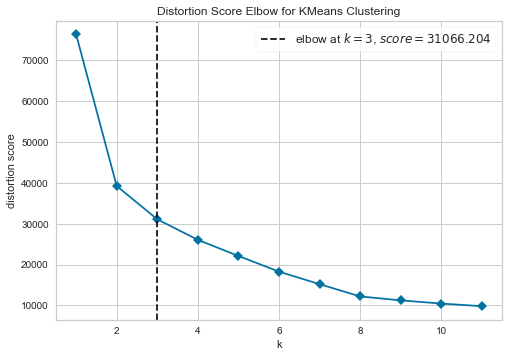

In [18]:
k_labenc = number_of_k(label_encoded_data)

In [19]:
a = list(range(2,12))
silhoute_values = []
for i in range(2,12):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(label_encoded_data)
    silhoute_values.append(silhouette_score(label_encoded_data,kmeans.labels_,sample_size=5000))

maximum_value = a[np.argmax(np.array(silhoute_values))]

print(maximum_value)  

3


## <font color="blue"> Training the Model and Printing histograms </font>

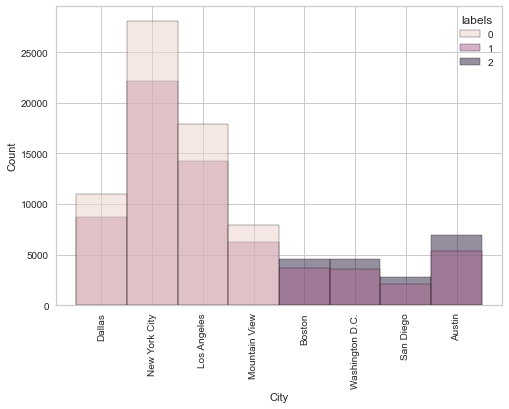

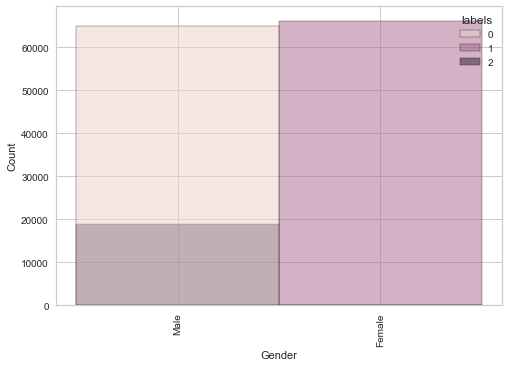

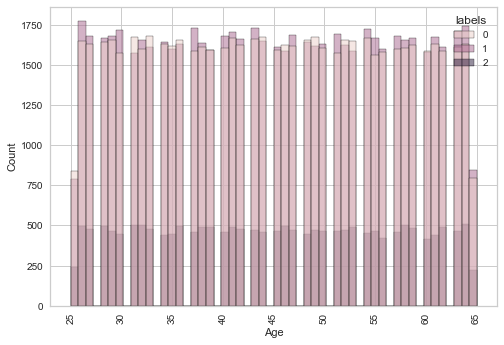

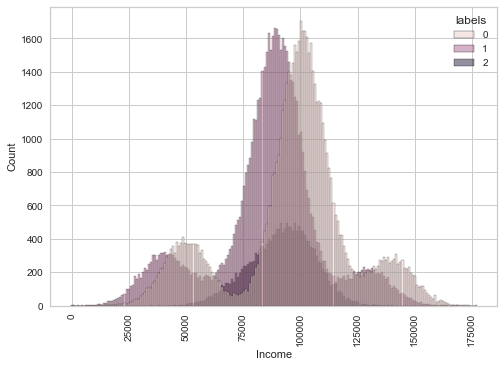

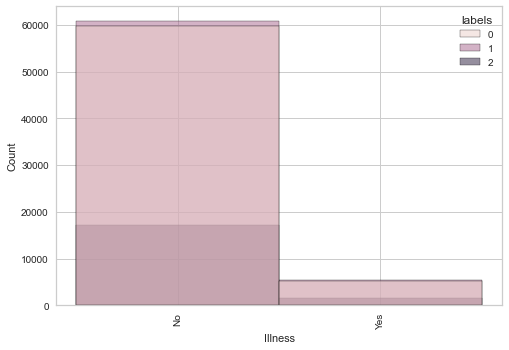

In [20]:
k_labenc1 = create_centroids(label_encoded_data,maximum_value,type="existing")
centroids_labenc = train_kmean(k_labenc1,label_encoded_data,iteration=20)
display_data_labenc = main_data.copy()
display_data_labenc["labels"] = centroids_labenc
display_data_labenc.drop(["Number"],inplace=True,axis=1)
visualize_histograms(display_data_labenc)

<hr/>

# <font color="red"> Trying Second technique:  Onehot Encoding </font>
<hr/>

## <font color="blue"> Finding Number of K values </font>

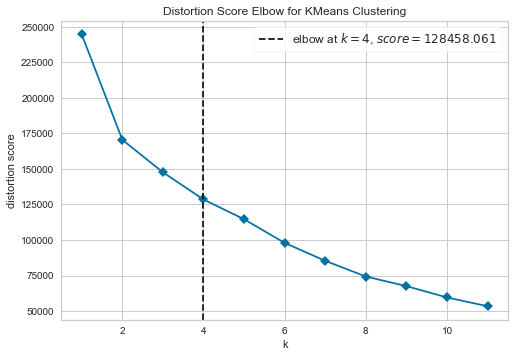

In [21]:
k_ohe = number_of_k(onehot_data)

In [22]:
a = list(range(2,20))
silhoute_values = []
for i in range(2,12):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(onehot_data)
    silhoute_values.append(silhouette_score(onehot_data,kmeans.labels_,sample_size=5000))

maximum_value = a[np.argmax(np.array(silhoute_values))]

print(maximum_value)  

11


## <font color="blue"> Training the Model and Printing historgrams </font>

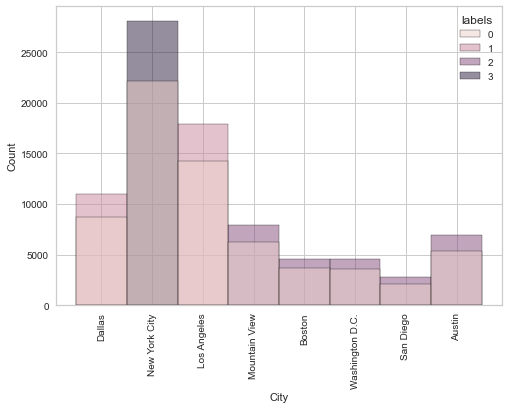

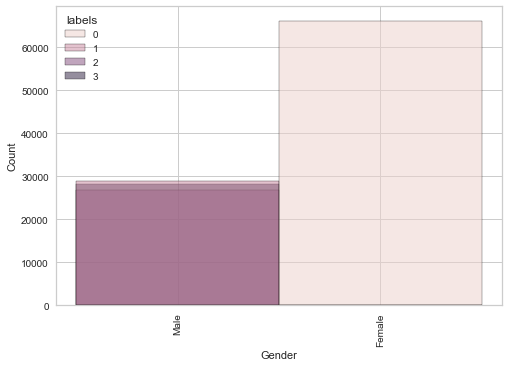

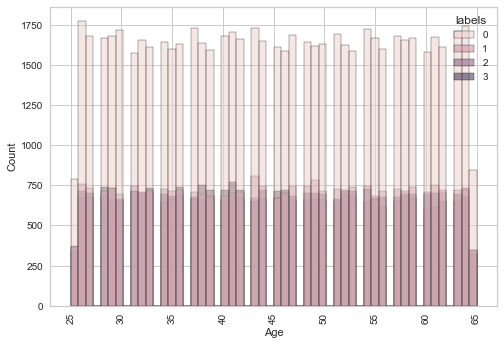

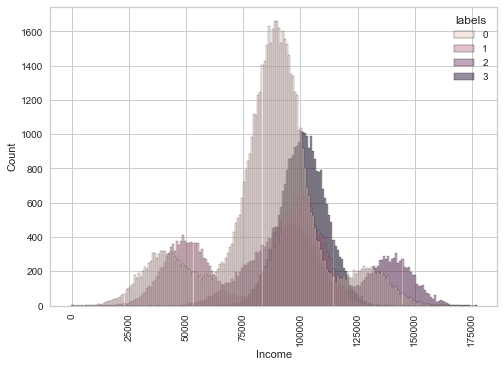

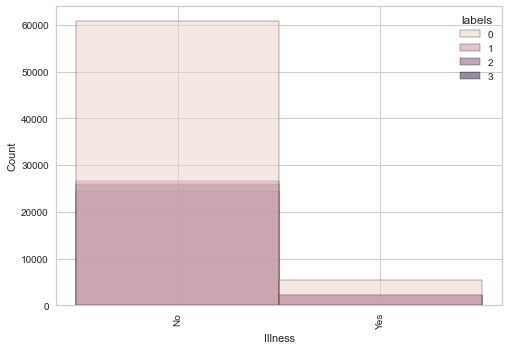

In [23]:
k_ohe1 = create_centroids(onehot_data,k_ohe,type="existing")
centroids_ohe = train_kmean(k_ohe1,onehot_data,iteration=20)
display_data_ohe = main_data.copy()
display_data_ohe["labels"] = centroids_ohe
display_data_ohe.drop(["Number"],inplace=True,axis=1)
visualize_histograms(display_data_ohe)

# <font color="red"> Trying Third technique:  Using Only Numerical Variables </font>
<hr/>

## <font color="blue"> Finding Number of K values </font>

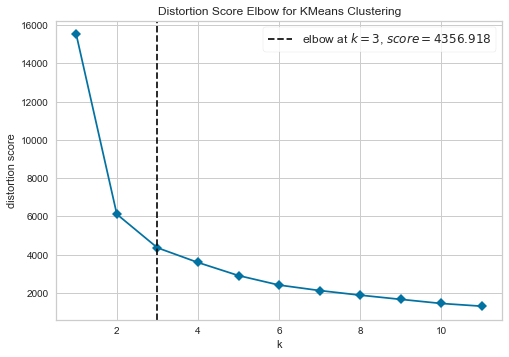

In [24]:
k_num = number_of_k(numerical_data)

In [25]:
a = list(range(2,12))
silhoute_values = []
for i in range(2,12):
    kmeans = KMeans(n_clusters=i, random_state=0).fit(numerical_data)
    silhoute_values.append(silhouette_score(numerical_data,kmeans.labels_,sample_size=5000))

maximum_value = a[np.argmax(np.array(silhoute_values))]

print(maximum_value)  

2


## <font color="blue"> Training the Model and Printing historgrams </font>

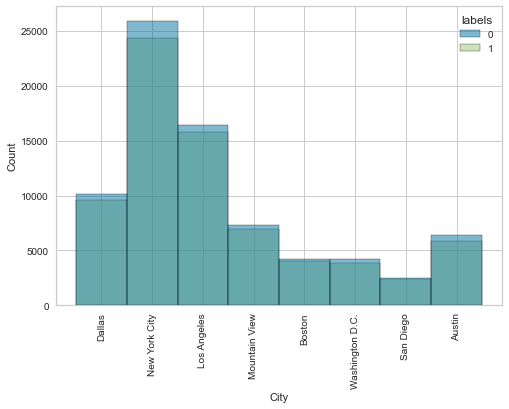

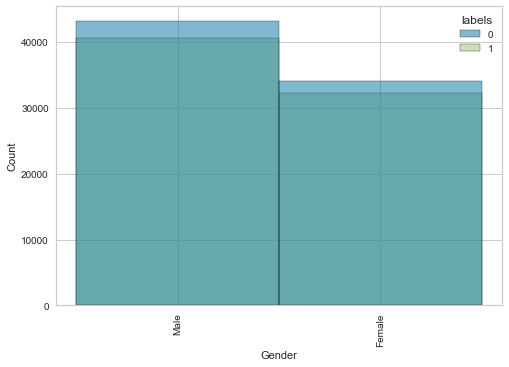

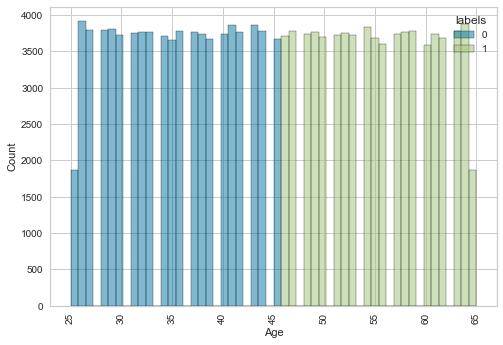

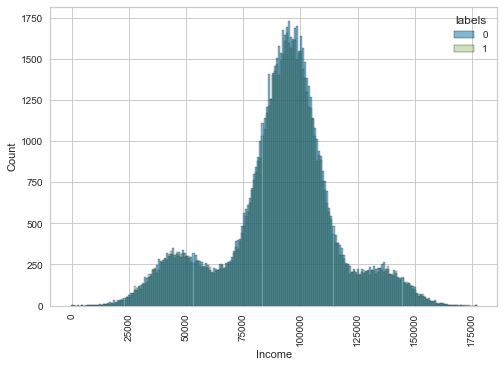

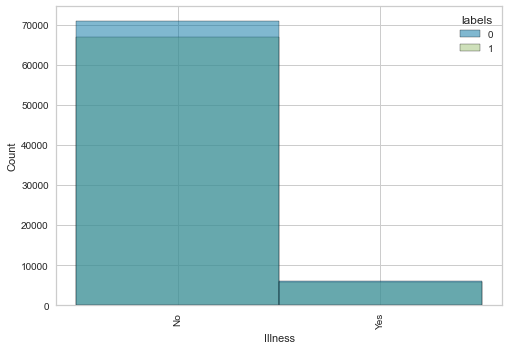

In [26]:
k_num1 = create_centroids(numerical_data,2,type="random")
centroids_num = train_kmean(k_num1,numerical_data,iteration=20)
display_data_num = main_data.copy()
display_data_num["labels"] = centroids_num
display_data_num.drop(["Number"],inplace=True,axis=1)
visualize_histograms(display_data_num)

# <font color="red"> Evaluation </font>
<hr/>

# Evaluating Label Encoding

C:\Users\afarooqui\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


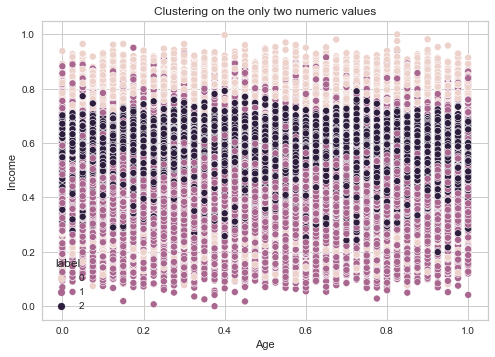

0.397313210305028


In [27]:
chk = label_encoded_data.copy()
chk["label"] = centroids_labenc
sns.scatterplot(chk.Age,chk.Income,hue=chk.label)
plt.title("Clustering on the only two numeric values")
plt.show()
print(silhouette_score(label_encoded_data,centroids_labenc))

# Evaluating One Hot Encoding

C:\Users\afarooqui\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


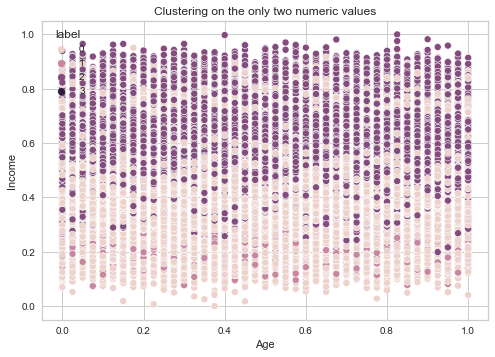

0.31916161636928486


In [28]:
chk = onehot_data.copy()
chk["label"] = centroids_ohe
sns.scatterplot(chk.Age,chk.Income,hue=chk.label)
plt.title("Clustering on the only two numeric values")
plt.show()
print(silhouette_score(onehot_data,centroids_ohe))

# Evaluating Numeric Only 

C:\Users\afarooqui\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\ProgramData\Anaconda3\Lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


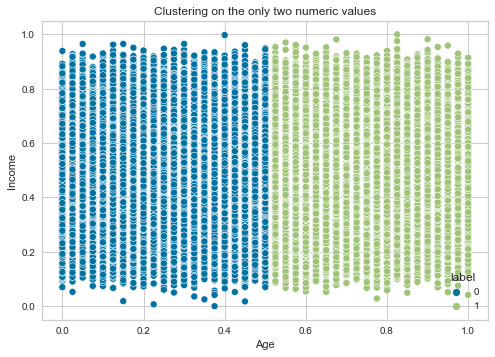

0.5018126669304845


In [29]:
chk = numerical_data.copy()
chk["label"] = centroids_num
sns.scatterplot(chk.Age,chk.Income,hue=chk.label)
plt.title("Clustering on the only two numeric values")
plt.show()
print(silhouette_score(numerical_data,centroids_num))